In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
complaintData = pd.read_csv('ComplaintsMetrix.csv')
shootData = pd.read_csv('ShootMetrix.csv')
complaintData = complaintData.drop(columns=['Unnamed: 0'])
shootData = shootData.drop(columns=['Unnamed: 0'])

In [3]:
complaintData.head(0)

,zipcode,Damaged Tree,Graffiti,Noise - Commercial,FATF,Overgrown Tree/Branches,Lost Property,Rodent,Illegal Parking,Broken Parking Meter,...,SRDE,Request Large Bulky Item Collection,Sweeping/Missed,DOF Property - Payment Issue,Litter Basket / Request,DPR Internal,Overflowing Litter Baskets,Outside Building,Electric,Quality of Life


In [4]:
shootData.head(0)

,ZIPCODE,Shoot


In [5]:
df = complaintData.merge(shootData, left_on='zipcode', right_on='ZIPCODE')
df.head(1)

,zipcode,Damaged Tree,Graffiti,Noise - Commercial,FATF,Overgrown Tree/Branches,Lost Property,Rodent,Illegal Parking,Broken Parking Meter,...,Sweeping/Missed,DOF Property - Payment Issue,Litter Basket / Request,DPR Internal,Overflowing Litter Baskets,Outside Building,Electric,Quality of Life,ZIPCODE,Shoot
0,11436,71,3,2,0,67,0,28,297,0,...,0,0,0,0,0,0,0,0,11436,76


In [6]:
correlation = df.corr().drop(columns=['zipcode', 'ZIPCODE','Shoot']).iloc[-1]
correlation = correlation.abs()
correlation = correlation.to_frame()
correlation = correlation.sort_values(by='Shoot', ascending=False)
correlation.head()

,Shoot
Unsanitary Condition,0.739288
Noise - Residential,0.711884
Indoor Sewage,0.668656
Day Care,0.618324
General,0.599098


<BarContainer object of 20 artists>

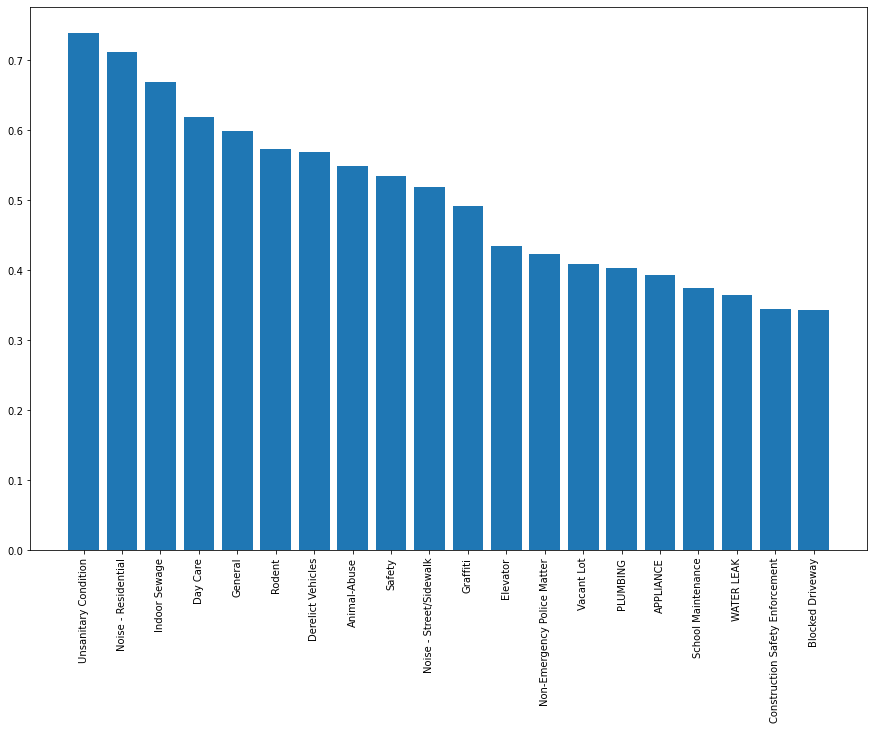

In [7]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(correlation.index[:20], correlation.Shoot[:20])
